In [141]:
from IPython.display import clear_output
from scipy.optimize import minimize
import scipy as sp
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
import random
import pandas as pd
from scipy import stats
import os
from tqdm import tqdm
epsilon = 1e-7
from math import exp, log

In [32]:
cd ..

/Users/junnai_ai/Desktop/統計


In [33]:
from MIC import *
from MIC.utils import *
from MIC.visualize import *
from MIC.calc import *

In [150]:
def draw_discrete(density,n, top=0.2, normalization=False):
    '''
    density: copula density function
    n: gridsize = n x n
    '''
    mat = np.zeros((n,n)) #init
    for i in range(n):
        for j in range(n):
            x = (i+0.5)/n
            y = (j+0.5)/n
            mat[i][j] = density(x,y) * (1/n) * (1/n) #density times area = mass
    if normalization:
        mat = mat/np.sum(mat)
    three_dim_plot_flatten(mat,top=top)
    if abs(np.sum(mat)-1) < 1e-2:
        return mat
    else:
        print(f"seems wrong. Sum is {np.sum(mat)}")

# RU copula

$$C(u, v) = uv + θA(u)B(v)$$
$$c(u, v) = 1 + θa(u)b(v)$$

In [238]:
def FGM_density(u,v):
    theta = 0.8
    return 1 + (2*u-1)*(2*v-1)*theta

def FGM_density_square(u,v):
    return FGM_density(u,v)**(-2)

def FGM_density_square_norm(u,v):
    theta = 0.8
    Z = (log(1+theta)-log(1-theta))/(2*theta)
    return FGM_density_square(u,v)/Z

def Frank_density(u,v):
    theta = 0.8
    Z = (log(1+theta)-log(1-theta))/(2*theta)
    theta = -theta*4*Z
    sigma = (np.exp(-theta*u)-1)*(np.exp(-theta*v)-1)/(np.exp(-theta)-1) + 1
    tmp = (np.exp(-theta)-1)*sigma
    term1 = theta*np.exp(-theta*u)*np.exp(-theta*v)*(np.exp(-theta*u)-1)*(np.exp(-theta*v)-1)/(tmp**2)
    term2 = theta*np.exp(-theta*u)*np.exp(-theta*v)/tmp
    return term1-term2

def copula_of_FGM_density_square_norm(u,v):
    theta = 0.8
    Z = (log(1+theta)-log(1-theta))/(2*theta)
    def inverse_(t):
        res = -(1-exp(4*Z*theta*t))*(1-theta**2)/((1-exp(4*Z*theta*t))*theta*theta + (1+exp(4*Z*theta*t))*theta)
        res /= 2
        return res
    
    def marginal_(w):
        return (-1/(1+(2*w-1)*theta) + 1/(1-(2*w-1)*theta))/(2*Z*(2*w-1)*theta)
    
    #plt.plot([marginal_(x/13) for x in range(1,13)])

    c = FGM_density_square_norm(inverse_(u),inverse_(v))/(marginal_(inverse_(u)) * marginal_(inverse_(v)))
    return c

array([[0.00017101, 0.00021287, 0.00026491, 0.0003296 , 0.00040997,
        0.00050973, 0.00063348, 0.00078682, 0.00097656, 0.00121098,
        0.0015    , 0.00185545, 0.00229123, 0.00282343, 0.00347025,
        0.00425172, 0.00518892, 0.00630269, 0.00761148, 0.00912825],
       [0.00021287, 0.00026447, 0.00032836, 0.00040736, 0.00050486,
        0.00062492, 0.00077234, 0.00095272, 0.00117247, 0.00143875,
        0.00175926, 0.00214186, 0.00259395, 0.00312147, 0.00372753,
        0.00441063, 0.00516262, 0.00596663, 0.00679551, 0.00761148],
       [0.00026491, 0.00032836, 0.00040652, 0.00050251, 0.00062003,
        0.00076327, 0.00093697, 0.00114622, 0.00139629, 0.00169216,
        0.00203797, 0.00243607, 0.00288589, 0.0033826 , 0.00391571,
        0.00446794, 0.00501491, 0.00552596, 0.00596663, 0.00630269],
       [0.0003296 , 0.00040736, 0.00050251, 0.00061843, 0.00075891,
        0.000928  , 0.00112986, 0.00136842, 0.00164681, 0.00196669,
        0.0023273 , 0.00272437, 0.00314903, 0

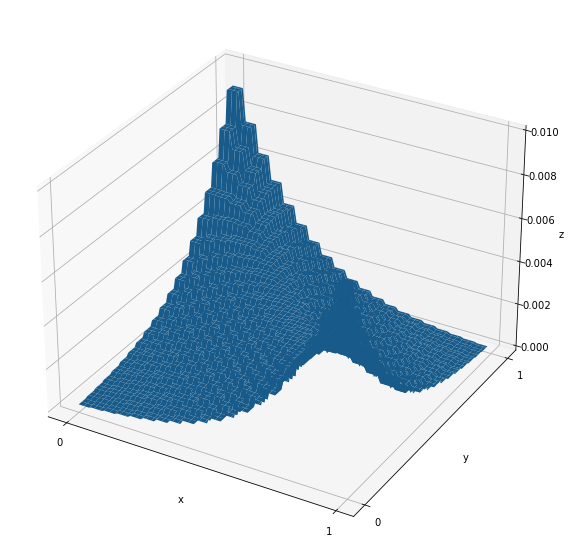

In [239]:
draw_discrete(Frank_density,20, top=0.01)

array([[0.004305, 0.004115, 0.003925, 0.003735, 0.003545, 0.003355,
        0.003165, 0.002975, 0.002785, 0.002595, 0.002405, 0.002215,
        0.002025, 0.001835, 0.001645, 0.001455, 0.001265, 0.001075,
        0.000885, 0.000695],
       [0.004115, 0.003945, 0.003775, 0.003605, 0.003435, 0.003265,
        0.003095, 0.002925, 0.002755, 0.002585, 0.002415, 0.002245,
        0.002075, 0.001905, 0.001735, 0.001565, 0.001395, 0.001225,
        0.001055, 0.000885],
       [0.003925, 0.003775, 0.003625, 0.003475, 0.003325, 0.003175,
        0.003025, 0.002875, 0.002725, 0.002575, 0.002425, 0.002275,
        0.002125, 0.001975, 0.001825, 0.001675, 0.001525, 0.001375,
        0.001225, 0.001075],
       [0.003735, 0.003605, 0.003475, 0.003345, 0.003215, 0.003085,
        0.002955, 0.002825, 0.002695, 0.002565, 0.002435, 0.002305,
        0.002175, 0.002045, 0.001915, 0.001785, 0.001655, 0.001525,
        0.001395, 0.001265],
       [0.003545, 0.003435, 0.003325, 0.003215, 0.003105, 0.002995,


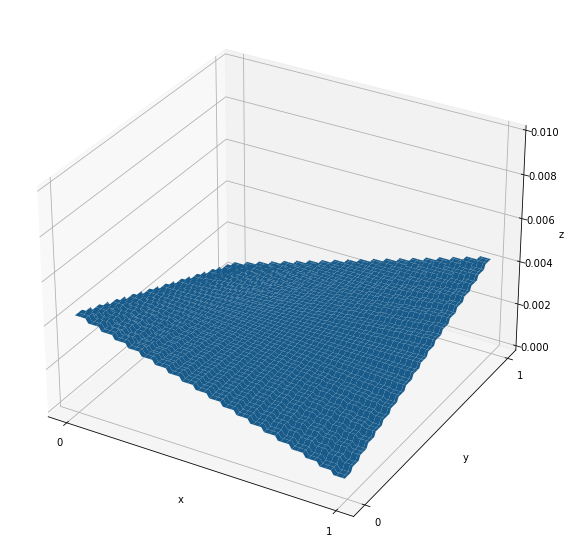

In [235]:
draw_discrete(FGM_density,20,top=0.01)

array([0.0853922 , 0.0674183 , 0.05675105, 0.04983467, 0.04511506,
       0.04181221, 0.03949756, 0.03792247, 0.03694015, 0.03646777,
       0.03646777, 0.03694015, 0.03792247, 0.03949756, 0.04181221,
       0.04511506, 0.04983467, 0.05675105, 0.0674183 , 0.0853922 ])

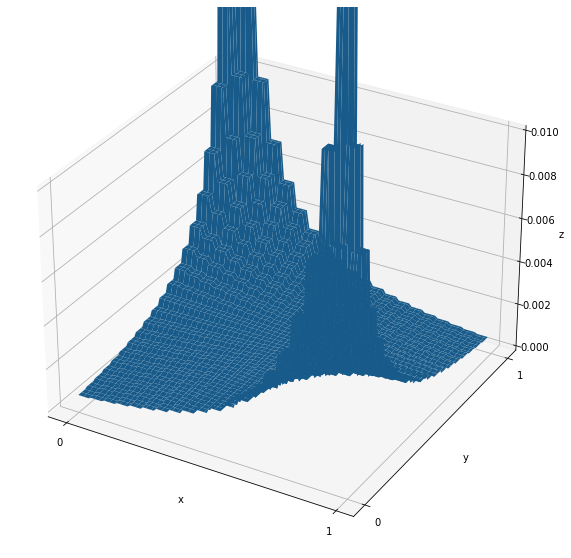

In [236]:
tmp = draw_discrete(FGM_density_square_norm,20,top=0.01)
np.sum(tmp,axis=1)
np.sum(tmp,axis=0) #copulaにはならない

FGM_density_square_normのコピュラを求める

-> これは逆向きFrankに一致

array([0.04992937, 0.04997007, 0.04999364, 0.05000672, 0.05001355,
       0.05001677, 0.05001802, 0.05001831, 0.05001823, 0.05001812,
       0.05001812, 0.05001823, 0.05001831, 0.05001802, 0.05001677,
       0.05001355, 0.05000672, 0.04999364, 0.04997007, 0.04992937])

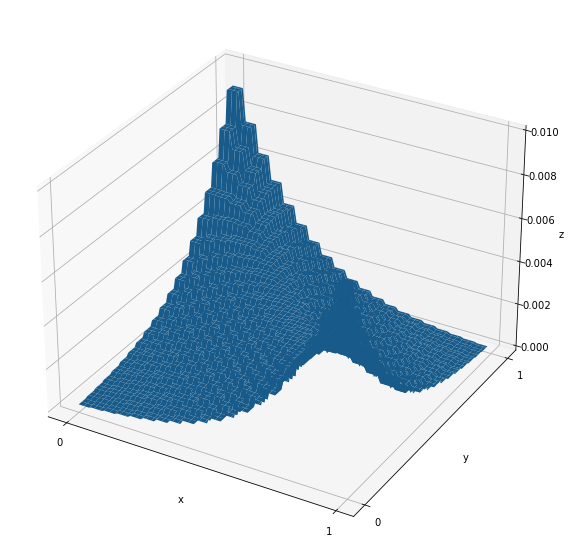

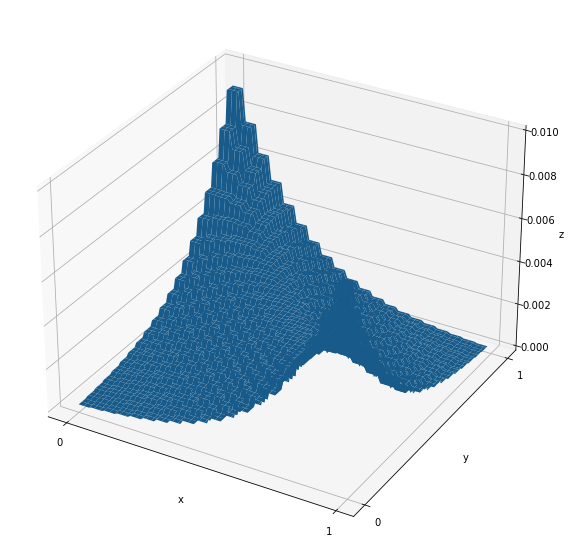

In [240]:
draw_discrete(Frank_density,20,top=0.01)
tmp = draw_discrete(copula_of_FGM_density_square_norm,20,top=0.01)
np.sum(tmp,axis=1)
np.sum(tmp,axis=0) #copulaになっている